In [1]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_amz


/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


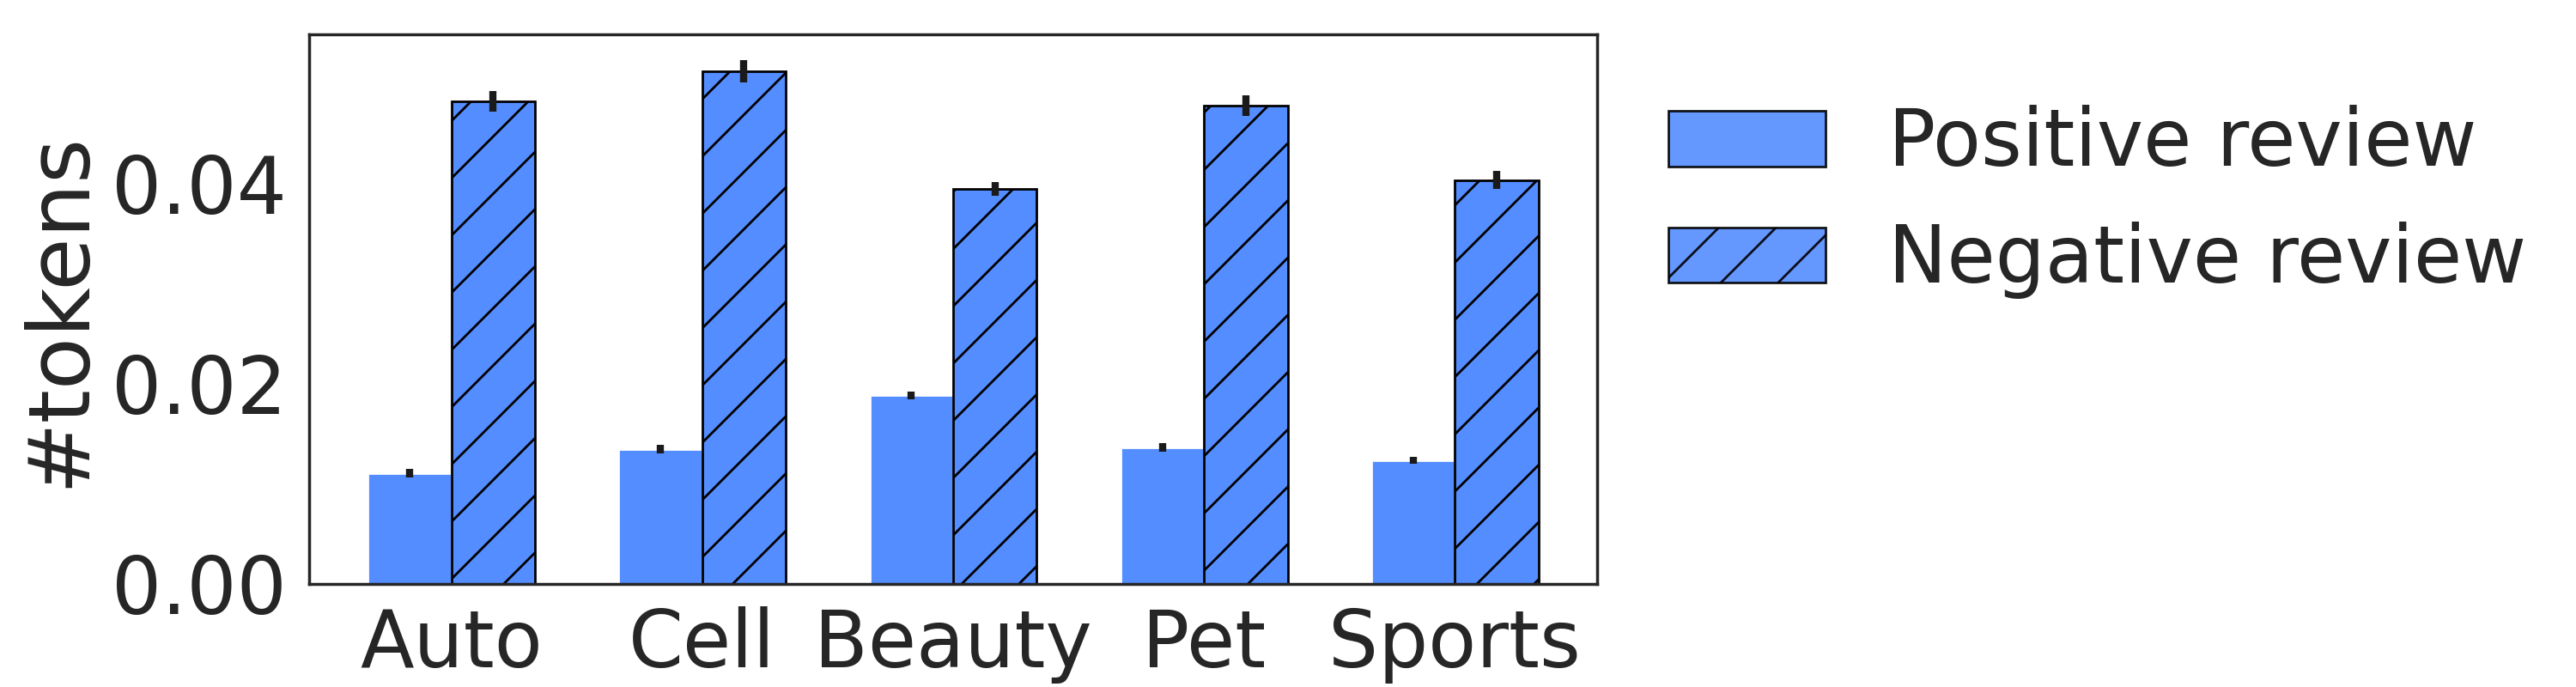

     name     value  sem_value  category
4  Auto    0.011060  0.000471   positive
5  Auto    0.048152  0.001023   negative
0  Cell    0.013450  0.000396   positive
1  Cell    0.051183  0.001073   negative
8  Beauty  0.018849  0.000384   positive
9  Beauty  0.039475  0.000682   negative
2  Pet     0.013603  0.000430   positive
3  Pet     0.047748  0.000992   negative
6  Sports  0.012329  0.000368   positive
7  Sports  0.040332  0.000867   negative
Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_non_amz


<IPython.core.display.Javascript object>


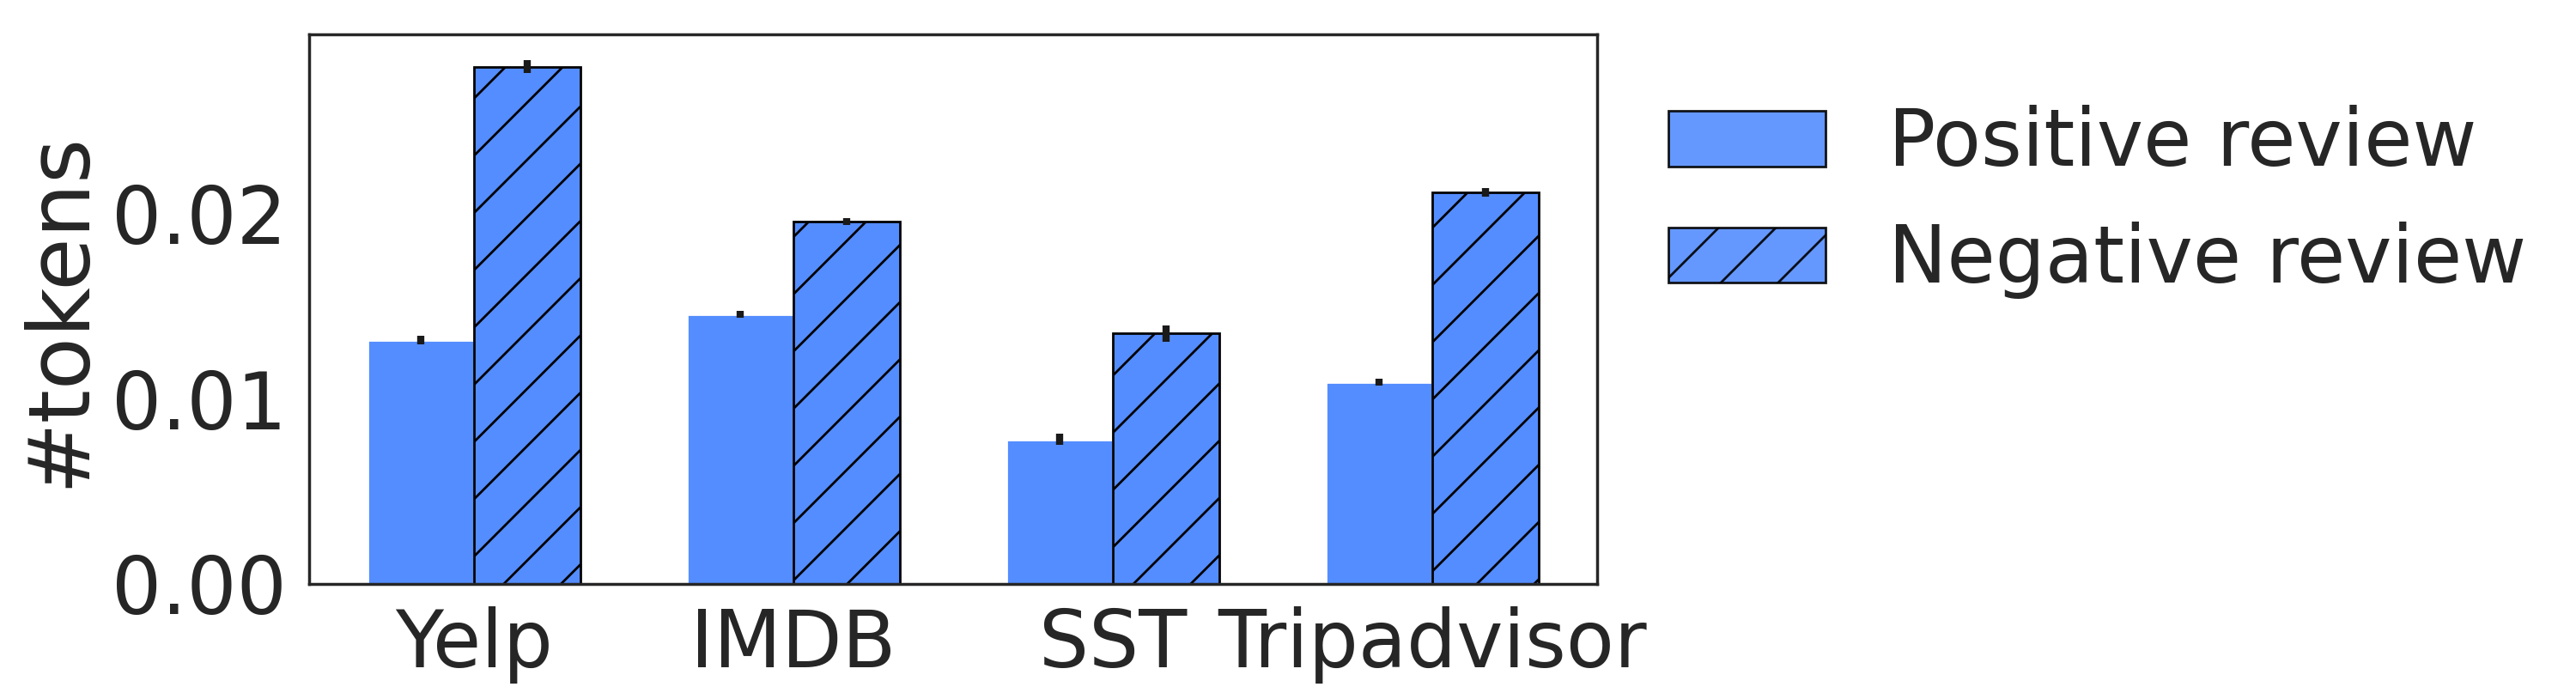

          name     value  sem_value  category
2  Yelp         0.013152  0.000253   positive
3  Yelp         0.027891  0.000335   negative
4  IMDB         0.014544  0.000180   positive
5  IMDB         0.019542  0.000200   negative
0  SST          0.007789  0.000298   positive
1  SST          0.013506  0.000437   negative
6  Tripadvisor  0.010890  0.000186   positive
7  Tripadvisor  0.021138  0.000232   negative
Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_amz


<IPython.core.display.Javascript object>


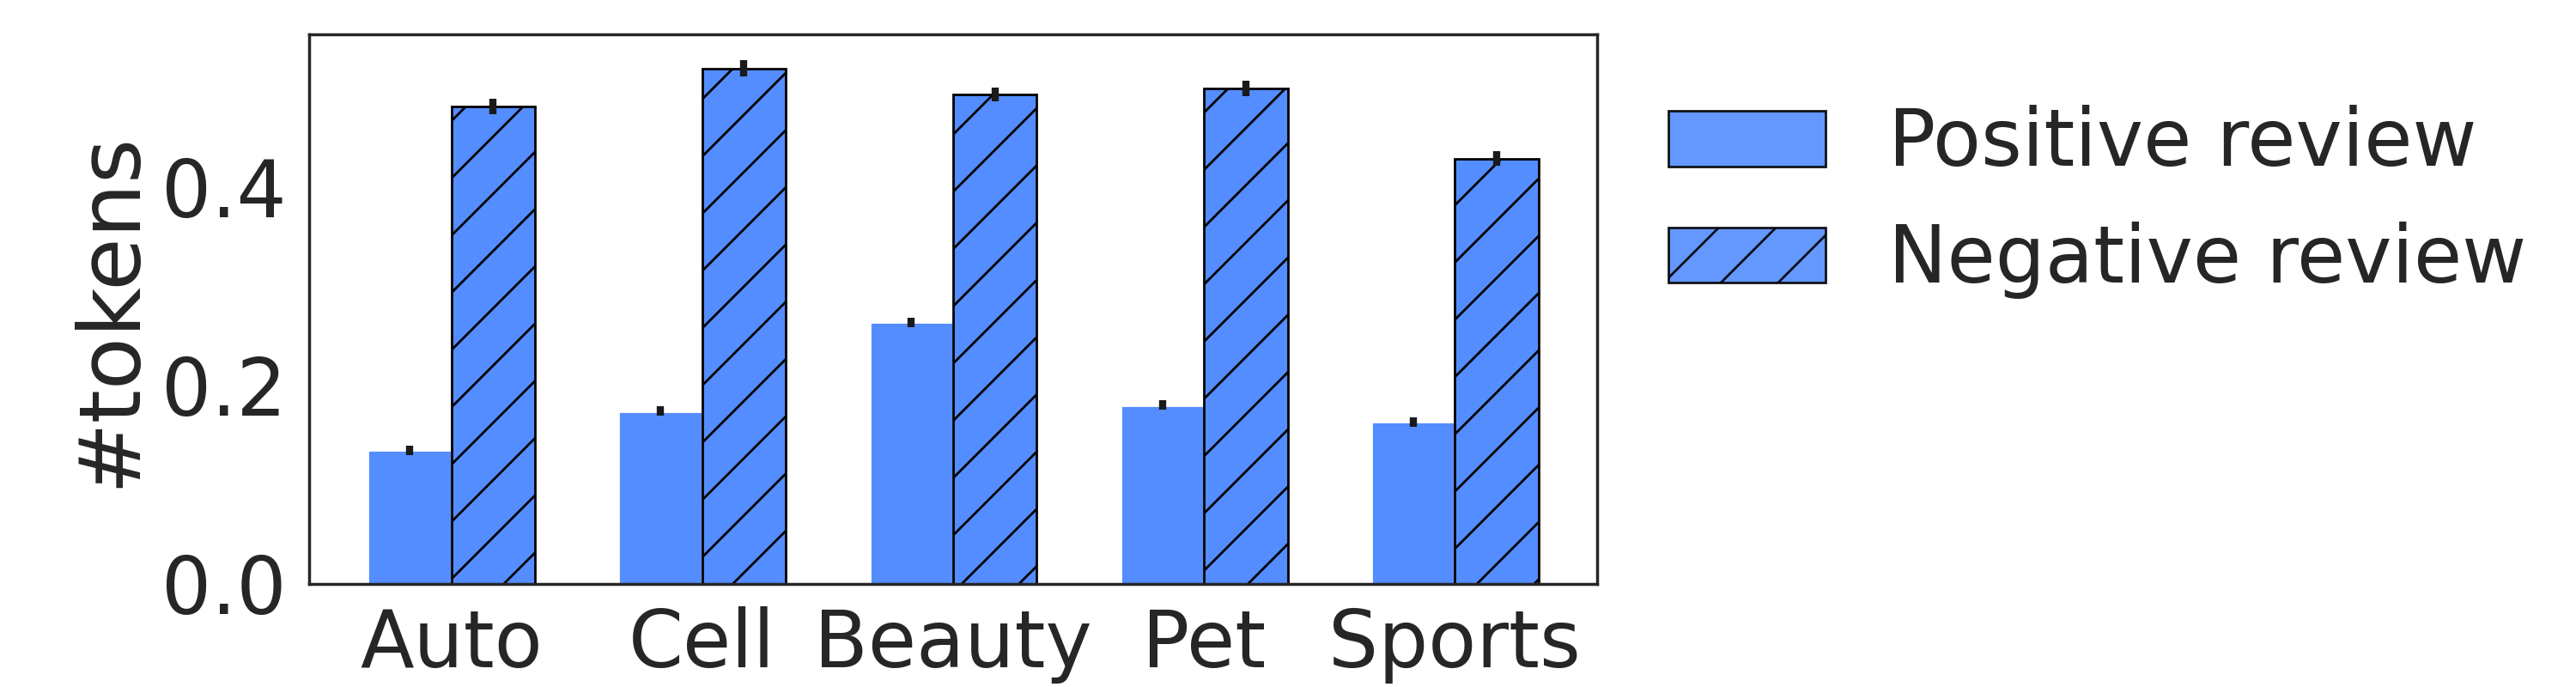

     name     value  sem_value  category
4  Auto    0.134421  0.004448   positive
5  Auto    0.480539  0.007751   negative
0  Cell    0.174005  0.004672   positive
1  Cell    0.518573  0.008105   negative
8  Beauty  0.263140  0.004726   positive
9  Beauty  0.492655  0.006931   negative
2  Pet     0.180117  0.004757   positive
3  Pet     0.498324  0.007659   negative
6  Sports  0.163010  0.004582   positive
7  Sports  0.428148  0.007043   negative
Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


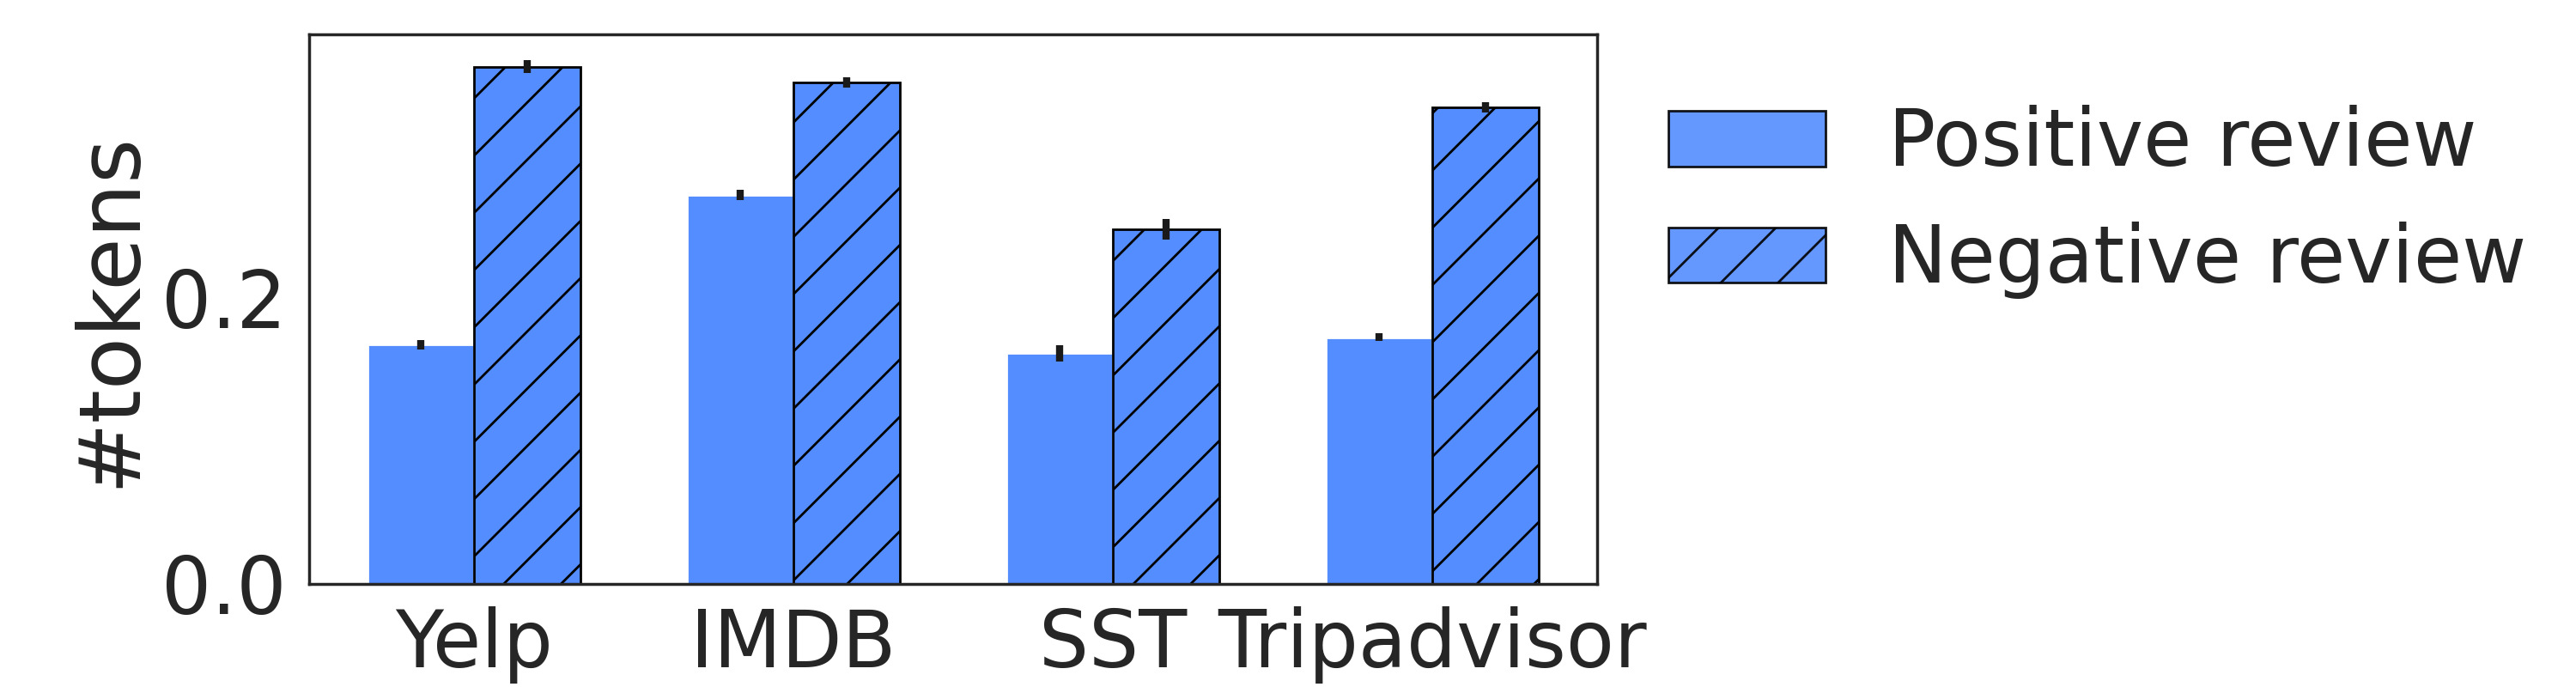

          name     value  sem_value  category
2  Yelp         0.166931  0.003303   positive
3  Yelp         0.360794  0.004316   negative
4  IMDB         0.271338  0.003314   positive
5  IMDB         0.349667  0.003602   negative
0  SST          0.160950  0.005677   positive
1  SST          0.247569  0.007264   negative
6  Tripadvisor  0.172165  0.002814   positive
7  Tripadvisor  0.332708  0.003585   negative
Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_amz


<IPython.core.display.Javascript object>


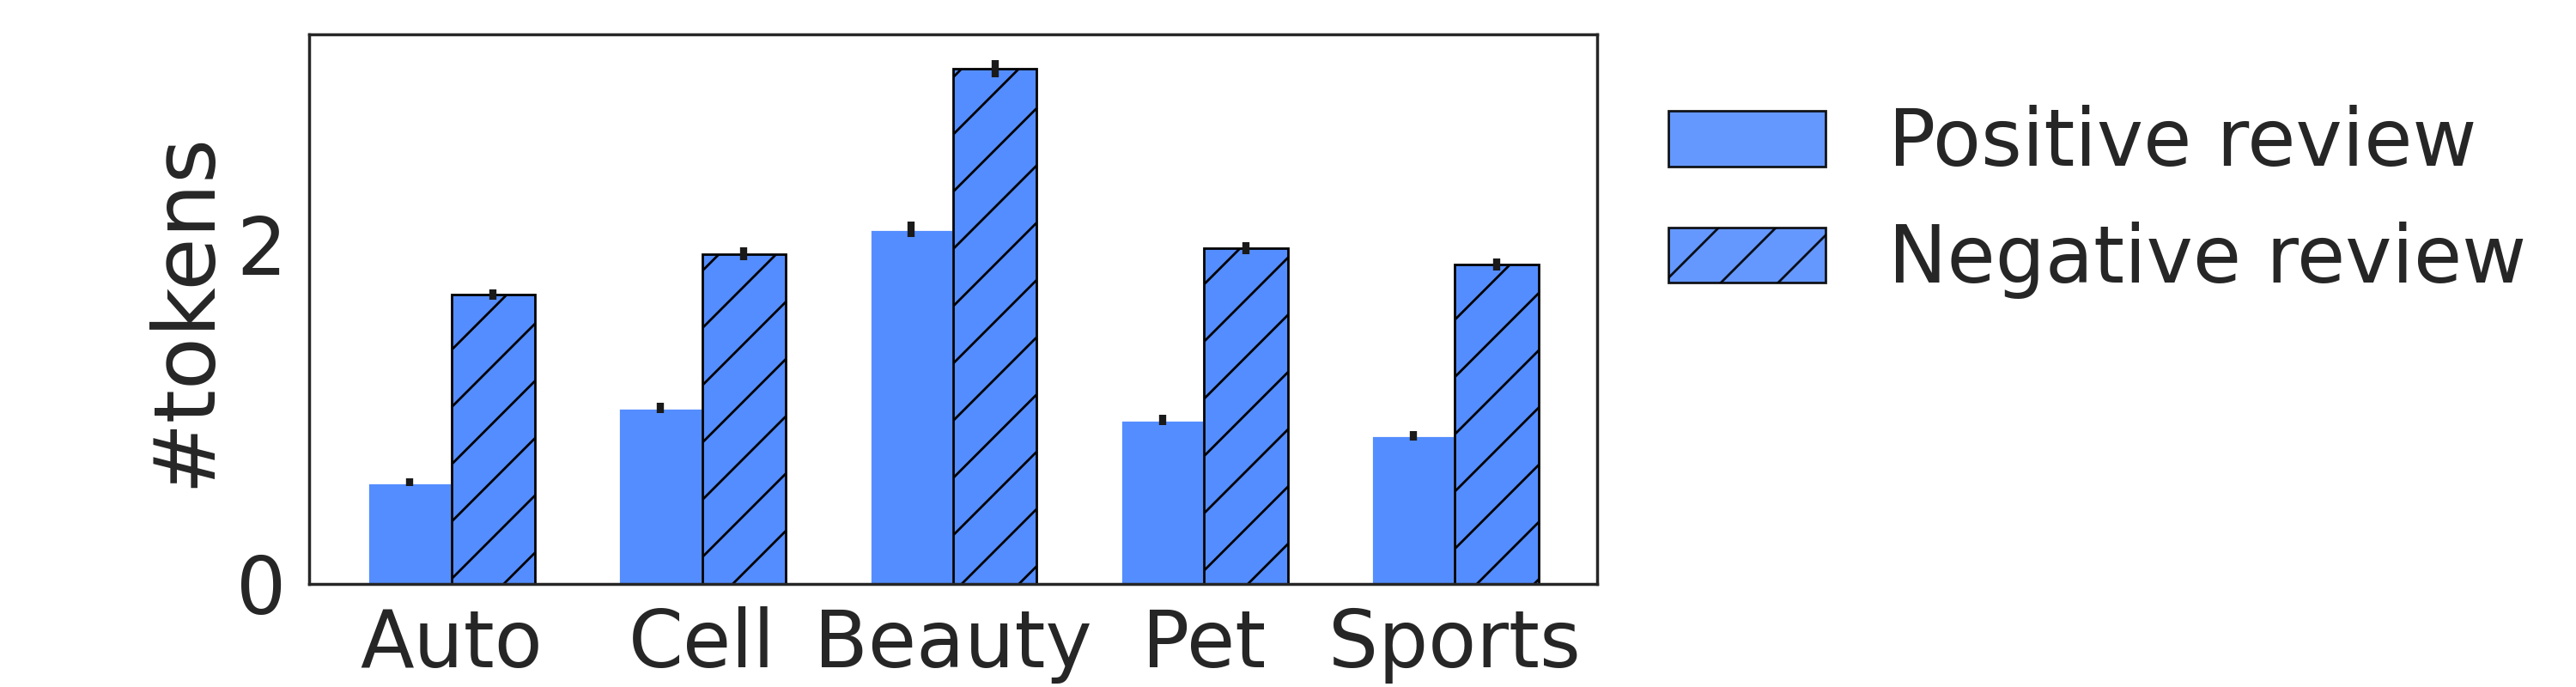

     name   value  sem_value  category
4  Auto    0.5976  0.021119   positive
5  Auto    1.7022  0.029680   negative
0  Cell    1.0362  0.031379   positive
1  Cell    1.9418  0.035786   negative
8  Beauty  2.0854  0.043865   positive
9  Beauty  3.0280  0.050445   negative
2  Pet     0.9646  0.029007   positive
3  Pet     1.9742  0.034768   negative
6  Sports  0.8728  0.027127   positive
7  Sports  1.8802  0.035603   negative
Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_non_amz


<IPython.core.display.Javascript object>


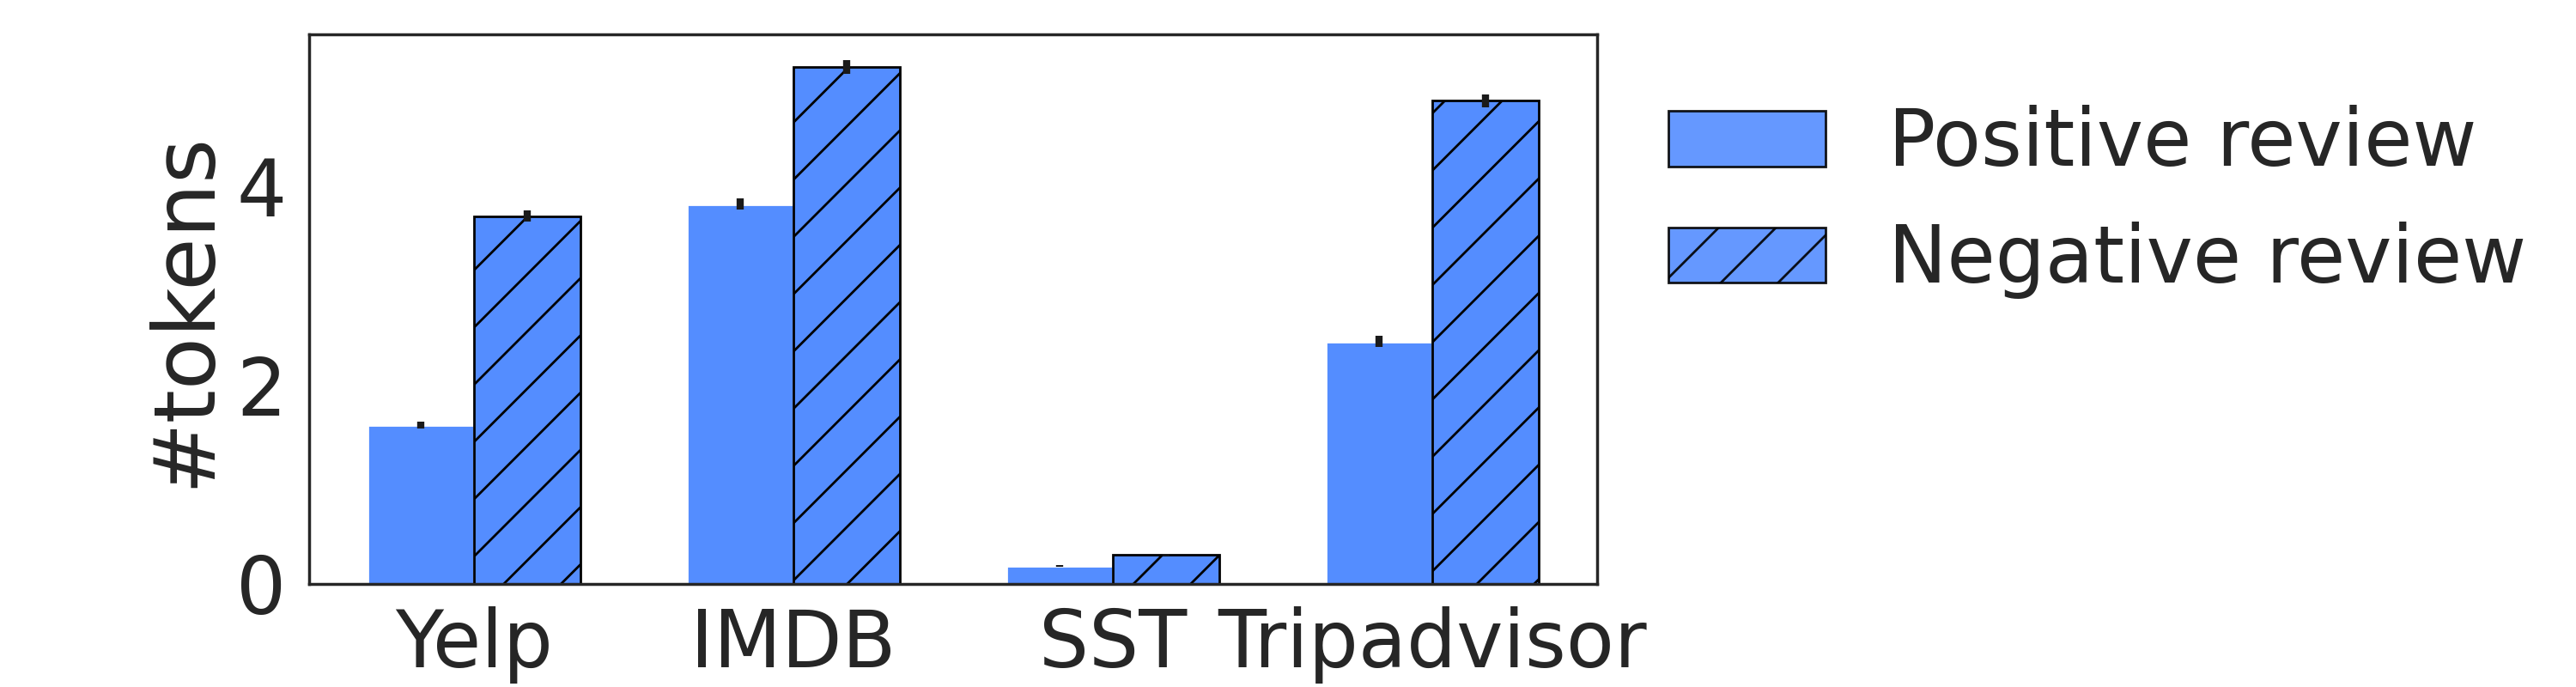

          name     value  sem_value  category
2  Yelp         1.594200  0.034526   positive
3  Yelp         3.699000  0.054082   negative
4  IMDB         3.819600  0.054148   positive
5  IMDB         5.195600  0.067897   negative
0  SST          0.182058  0.006279   positive
1  SST          0.289537  0.008433   negative
6  Tripadvisor  2.438400  0.055074   positive
7  Tripadvisor  4.859000  0.067088   negative


In [6]:
# Vader negation only distribution
saves_dir = os.path.join("../saves", "vader_negation_only")
Path(saves_dir).mkdir(parents=True, exist_ok=True)   
plot_save_prefix = "vader_negation_only_dist"

seed_vals = [23]
plot_data = {
    "word_level": [],
    "sent_level": [],
    "review_level": []
}
analysis_types = list(plot_data.keys())
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))

reload(seaborn_plot_util)
for analysis in analysis_types:
    amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])    

    seaborn_plot_util.draw_grouped_barplot_two_subbars(amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
#         y_axis_name="\#tokens",
        amazon_data_flag=True)

    seaborn_plot_util.draw_grouped_barplot_two_subbars(non_amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
#         y_axis_name="\#tokens",
        amazon_data_flag=False)

'word_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_non_amz


<IPython.core.display.Javascript object>


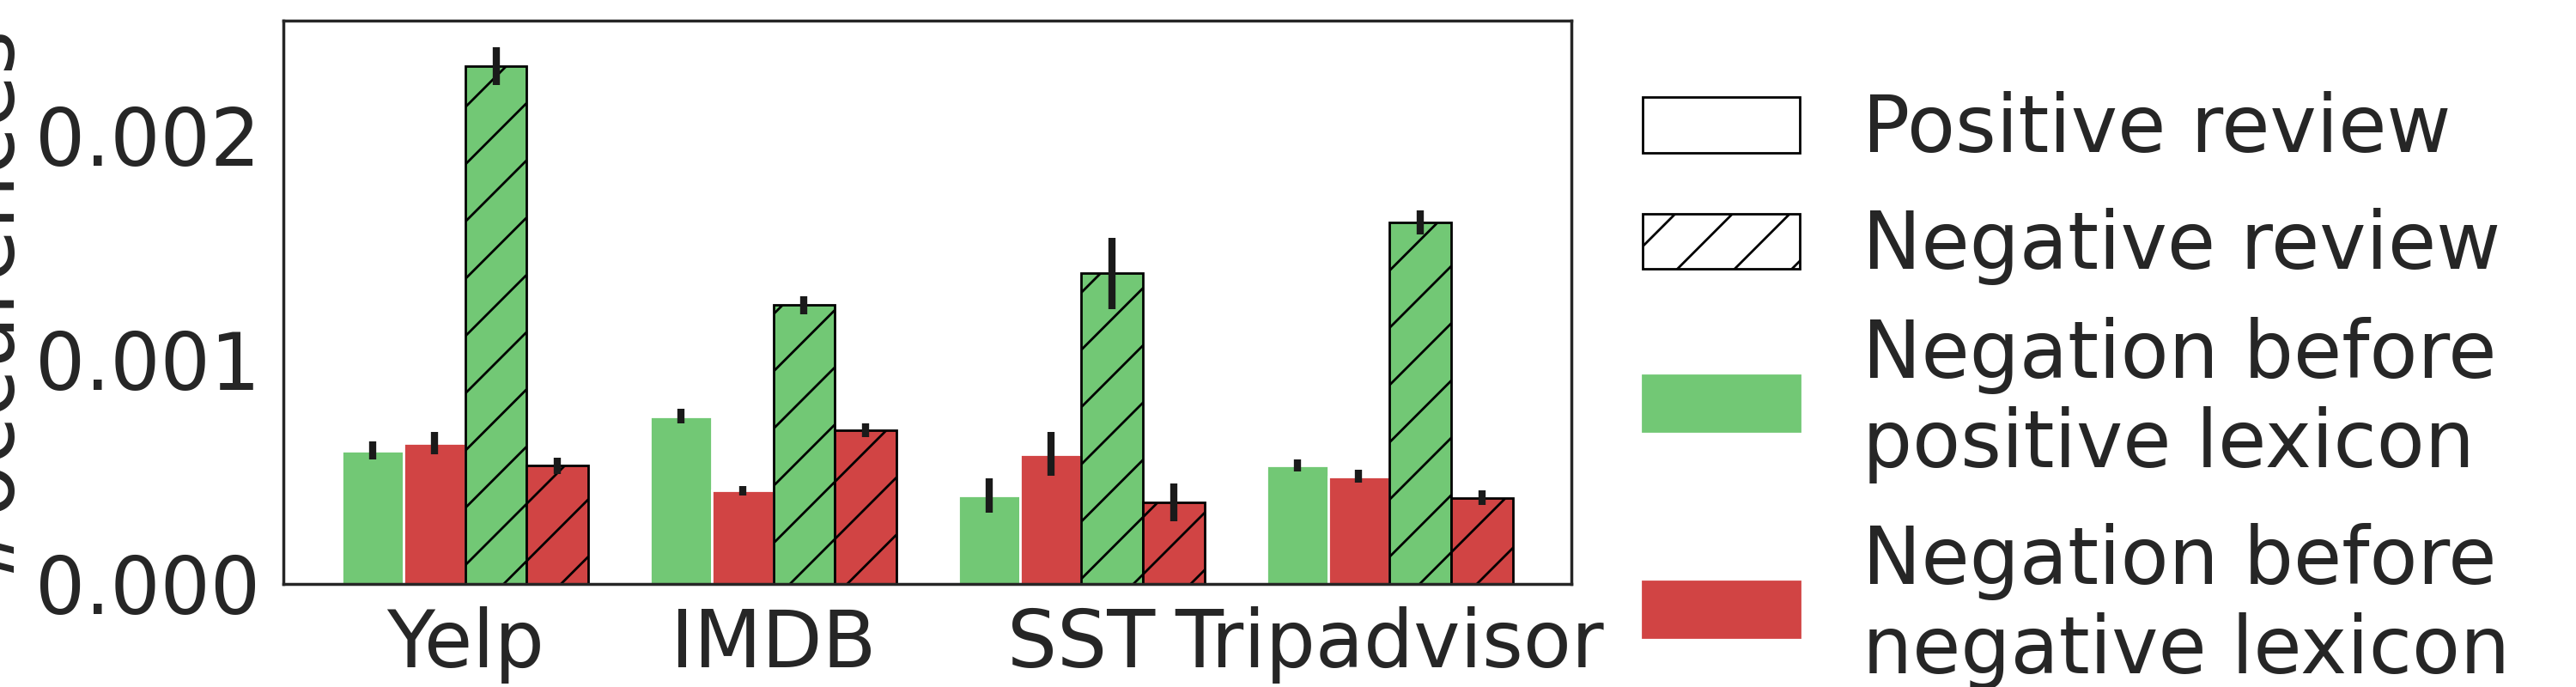

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_amz


<IPython.core.display.Javascript object>


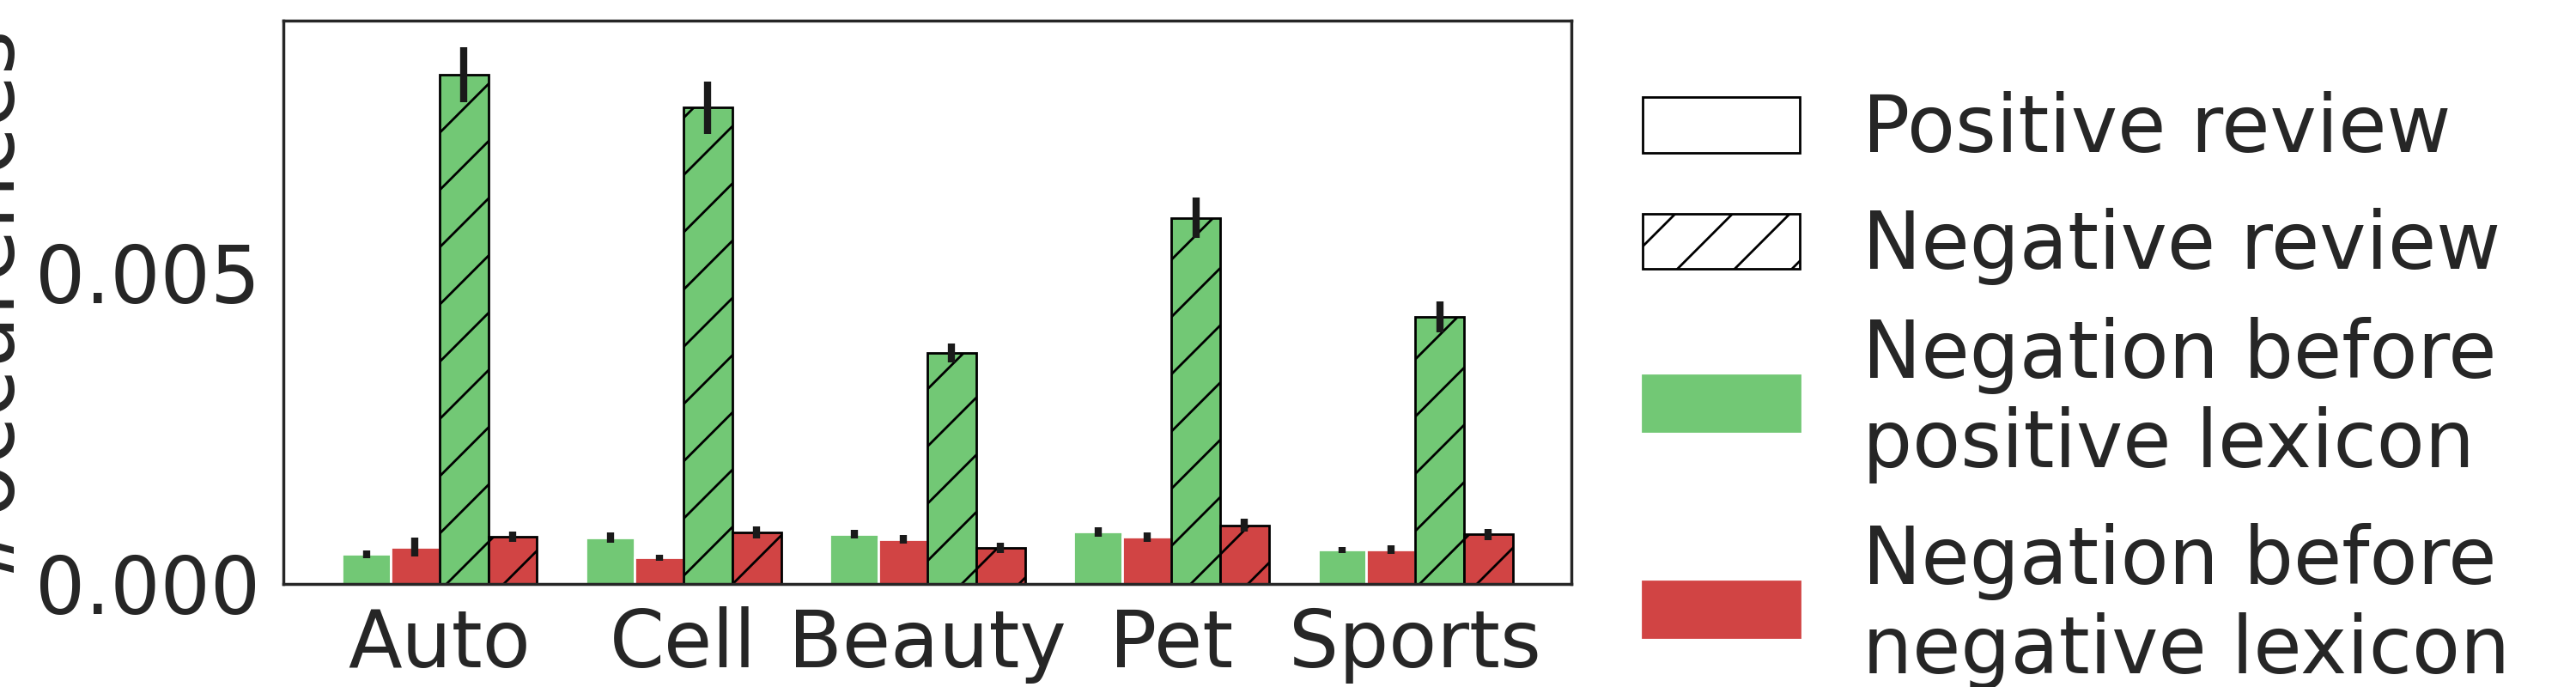

'sent_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


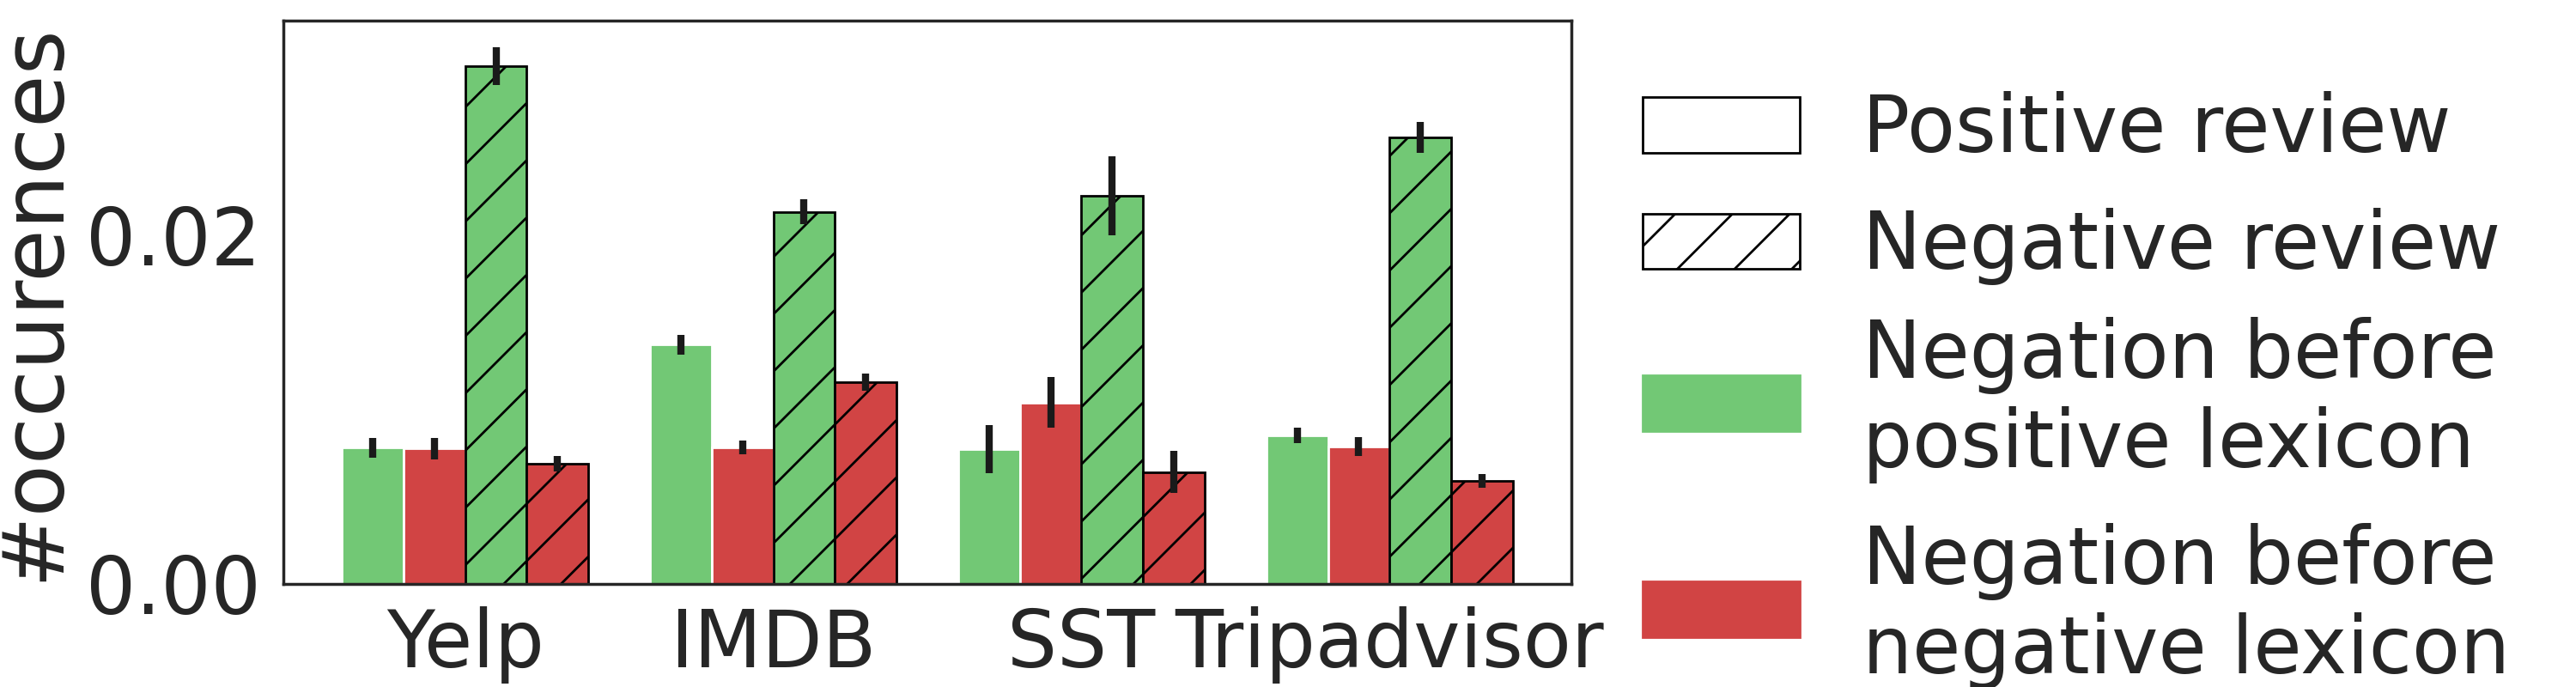

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_amz


<IPython.core.display.Javascript object>


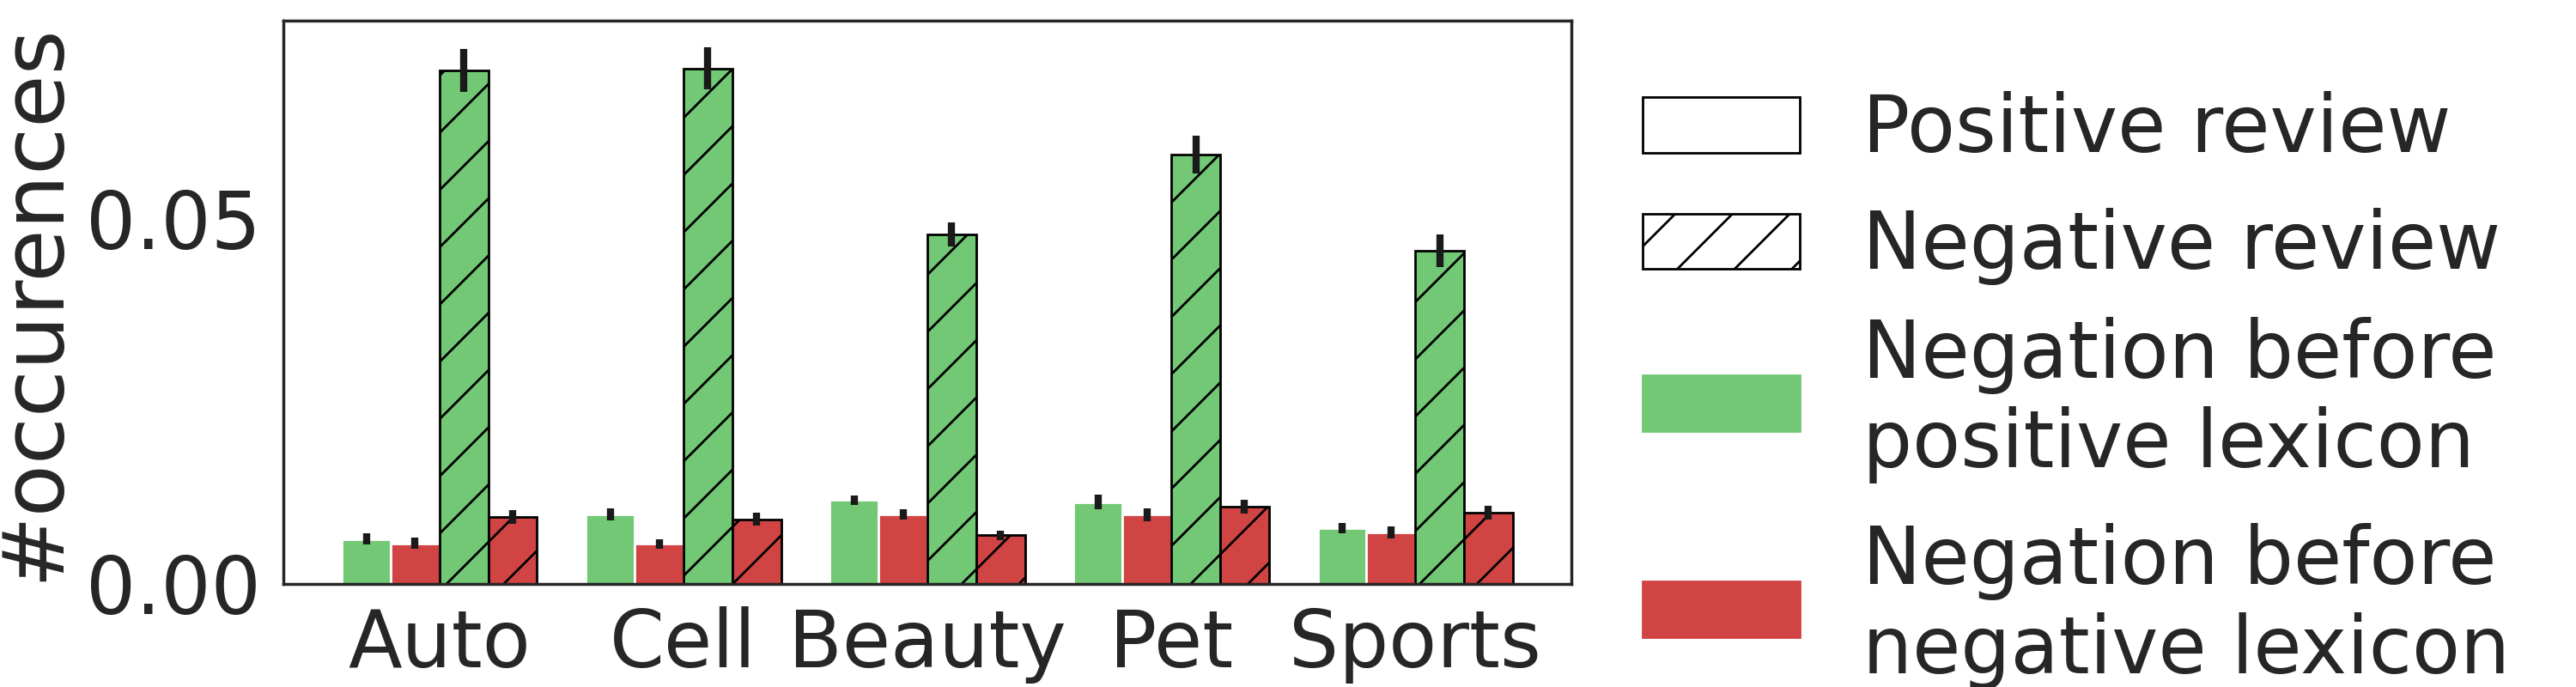

'review_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_non_amz


<IPython.core.display.Javascript object>


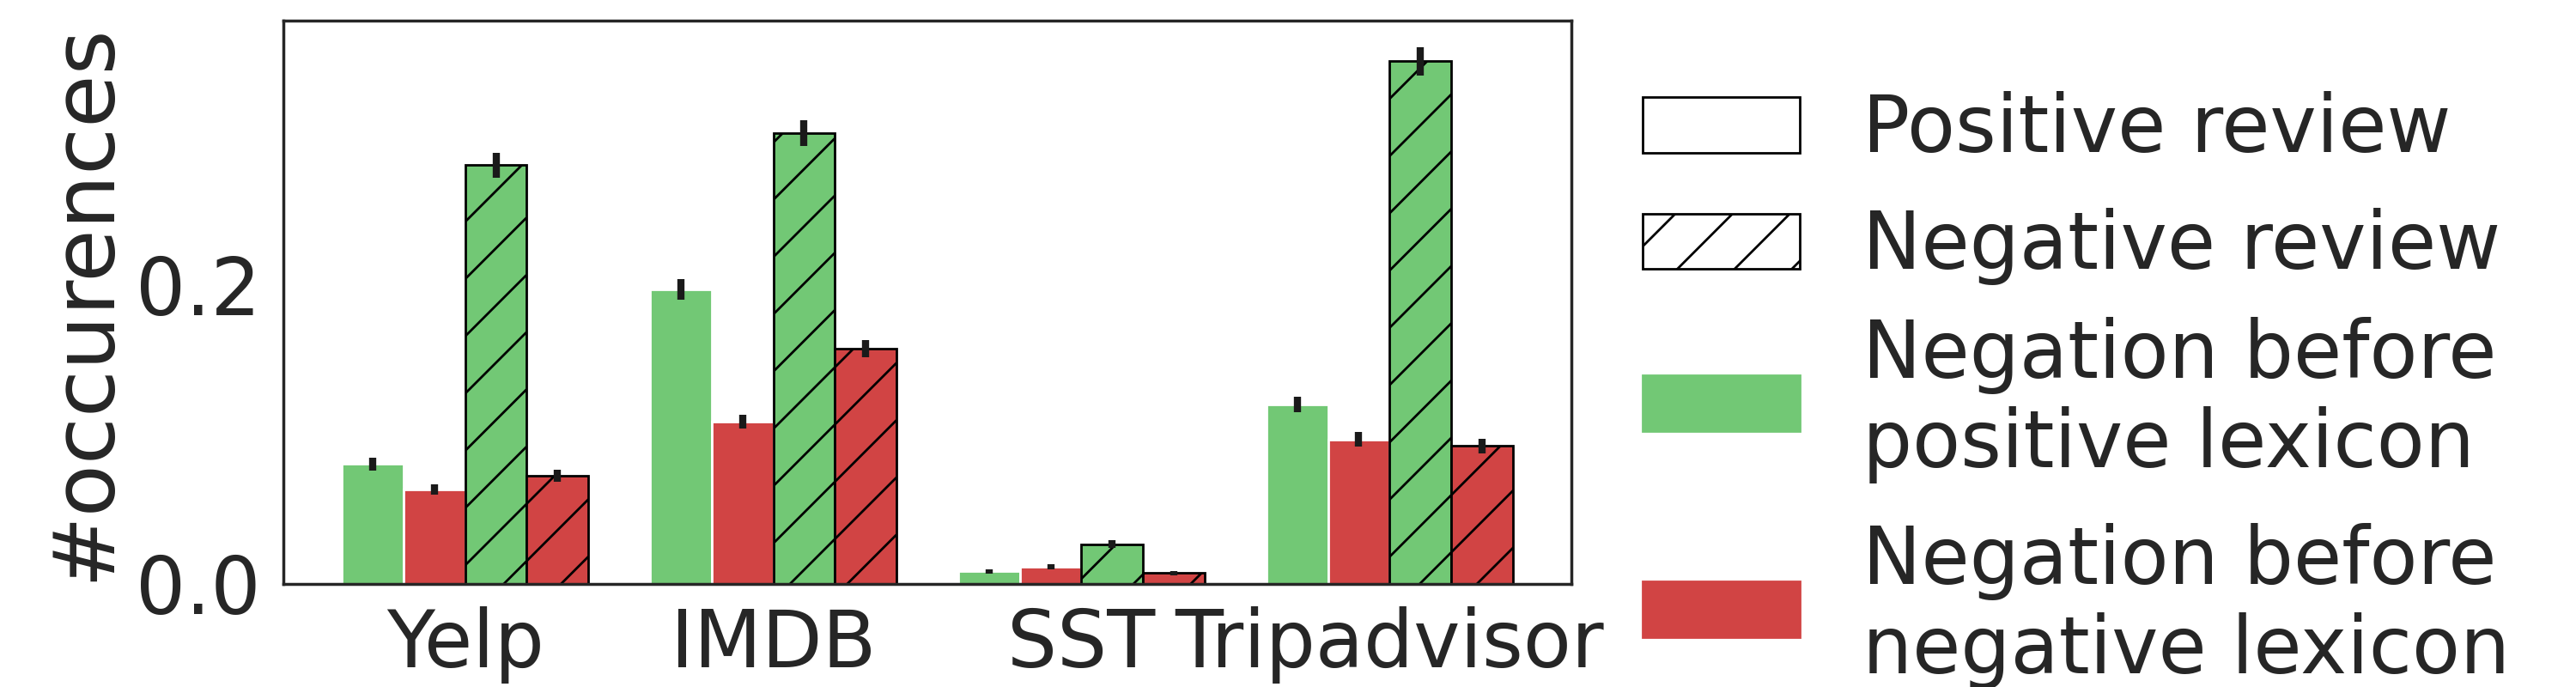

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_amz


<IPython.core.display.Javascript object>


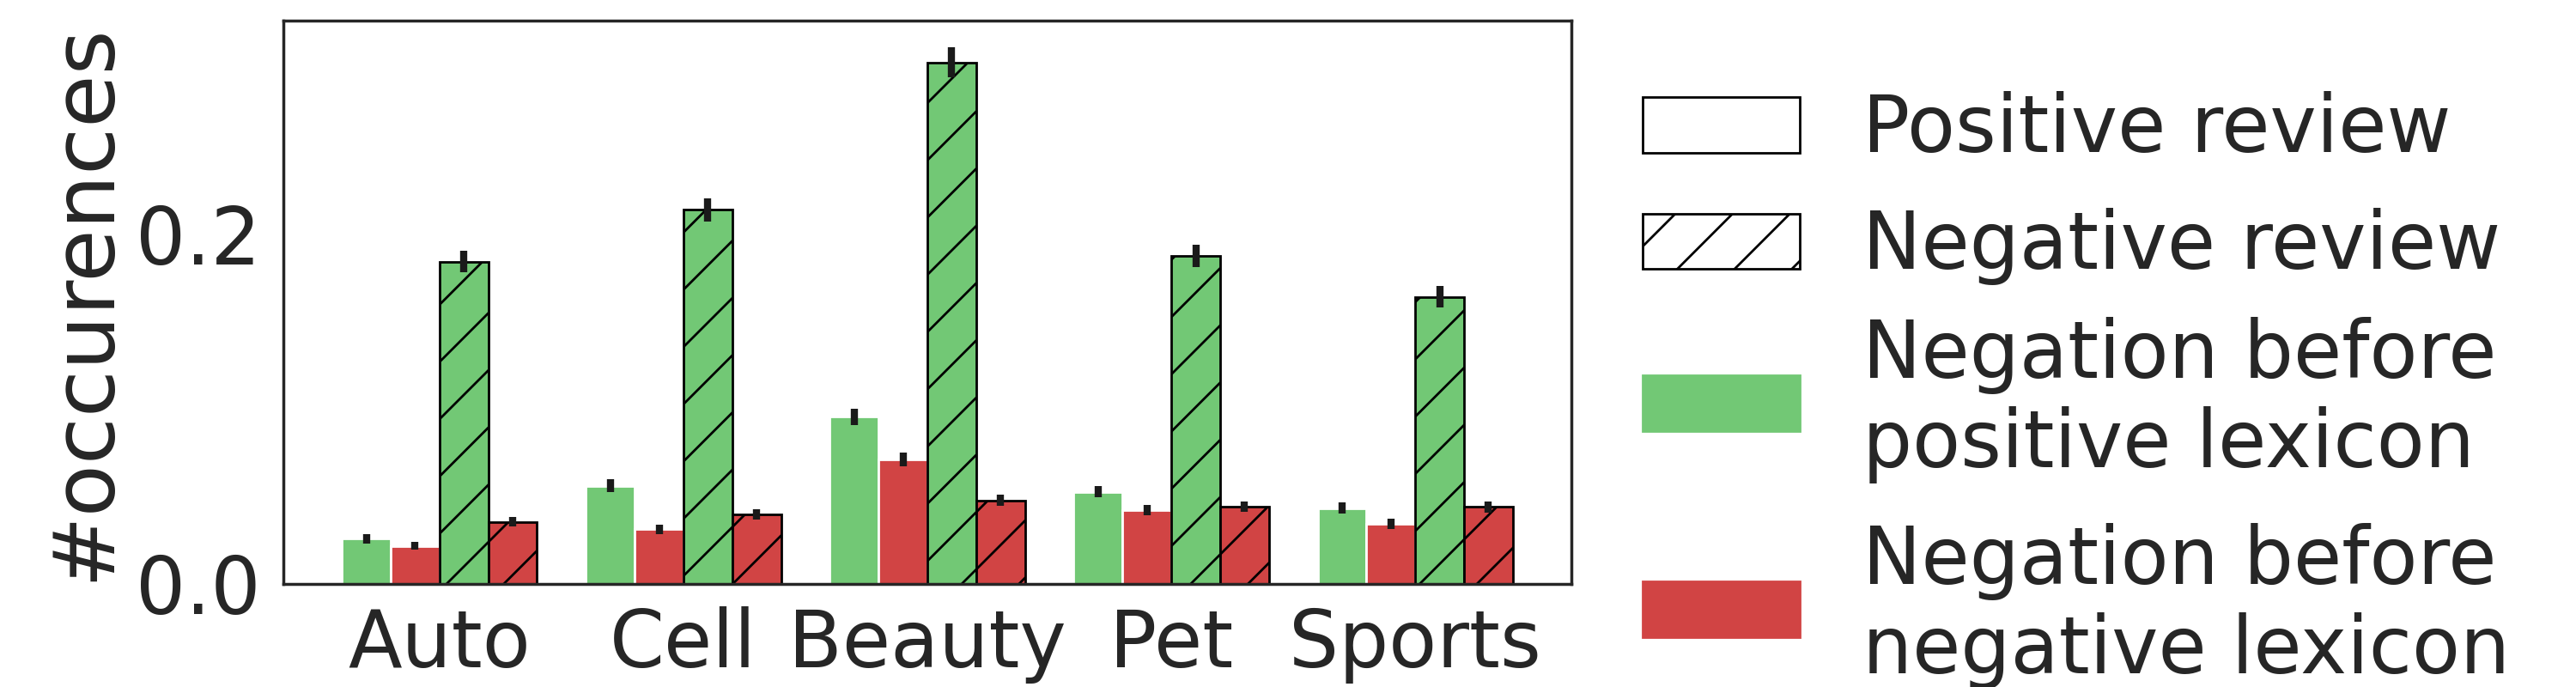

In [7]:
saves_dir = os.path.join("../saves", "vader_pos_neg_negation_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../input.json").read())
preload_flag = True
plot_save_prefix = "vader_pos_neg_negation_dist"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))


for analysis in analysis_types: 
    myprint(analysis)
    amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])
    seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
    #   ylim_top=None, 
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#occurences",
        negation=True)
    seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
            "review category", "text sentiment",
            os.path.join(saves_dir,
            plot_save_prefix+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            amazon_data_flag=True,
            y_axis_name="#occurences",
            negation=True)